# BFS and DFS traversal
## BFS Algorithm
### Initialization
1. Mark all vertices as **not visited**.
2. Create an empty **queue** to keep track of traversal order.
### Starting the Traversal
3. Mark the **start vertex** as visited.
4. Show (or process) the start vertex.
5. Append the **start vertex** to the traversal queue.
### Loop Until Queue Is Empty
6. While the traversal queue is not empty:
    - Remove the vertex from the **front** of the queue and consider it the current vertex.
    - For each vertex in the graph:
        - If there is an **edge** between the current vertex and this vertex, and it has **not been visited**:
            - Mark this vertex as visited.
            - Show (or process) this vertex.
            - Append this vertex to the **end** of the queue.
### Completion
- After traversal, optionally **reset visited status** for all vertices.
***
## DFS Algorithm
### Initialization
1. Begin with a **start vertex** for traversal.
2. Initialize a **visited stack/list** to track which vertices have been visited.
### Recursive Traversal Function
3. Define a recursive function `traverse(currentVertex)`:
    - If the current vertex is already marked as visited in the visited stack, return to avoid revisiting.
    - Otherwise, display or process the current vertex (e.g., using the `showVertex` method).
    - Mark the current vertex as visited.
### Exploring Neighbors
4. For each vertex in the graph:
    - a. Check if there is an edge from the current vertex to this neighbor (`edge > 0`).
    - b. If the neighbor vertex is not visited, recursively call `traverse(vertex)` on this neighbor.
### Start Traversal
5. Call the `traverse` function starting at the start vertex.
### Post-Traversal Cleanup
6. After the traversal, reset the visited stack values to `False` for all vertices, preparing for future DFS runs.
***
## Initializing the graph

In [1]:
graph = [
    [0,1,0,0,0,1,0,0,0],
    [1,0,1,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0],
    [0,1,0,0,1,0,0,0,0],
    [0,0,0,1,0,0,0,1,0],
    [1,0,0,0,0,0,1,0,1],
    [0,0,0,0,0,1,0,1,0],
    [0,0,0,0,1,0,1,0,0],
    [0,0,0,0,0,0,0,0,0],
]

## Visualizing the graph

In [2]:
import networkx as nx 
import matplotlib.pyplot as plt

# Defining a Class 
class GraphVisualization: 

    def __init__(self, weighted, edge_list = [], adjacency_matrix = [], isDirected = False, useAlphabets = False): 
        self.weighted = weighted
        self.G = (nx.DiGraph() if isDirected else nx.Graph())
        
        if len(edge_list) > 0:
            for i in edge_list:
                self.G.add_edge(i[0], i[1], weight = i[2])
        
        elif len(adjacency_matrix) > 0:
            for i in range(len(adjacency_matrix)):
                for j in range(len(adjacency_matrix[i])):
                    if adjacency_matrix[i][j] <= 0: continue
                    if useAlphabets:
                        self.G.add_edge(chr(i+97), chr(j+97), weight = adjacency_matrix[i][j])
                    else: self.G.add_edge(i + 1, j + 1, weight = adjacency_matrix[i][j])
        
        elif len(edge_list) == 0 and len(adjancency_matrix) == 0:
            raise Exception("I expect atleast an edge-list or an adjancency matrix")
    
    # In visualize function G is an object of 
    # class Graph given by networkx G.add_edges_from(visual) 
    # creates a graph with a given list 
    # nx.draw_networkx(G) - plots the graph 
    # plt.show() - displays the graph 
    def visualize(self):
        pos = nx.spring_layout(self.G, scale = 5000)

        # Manually scale up the positions for more spacing
        for key in pos:
            pos[key] *= 10000
        nx.draw_networkx(self.G, pos, node_size=700, node_color='#00ccff', font_size=10)

        if self.weighted:
            # Draw edge labels for weights
            labels = nx.get_edge_attributes(self.G, 'weight')
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.show()

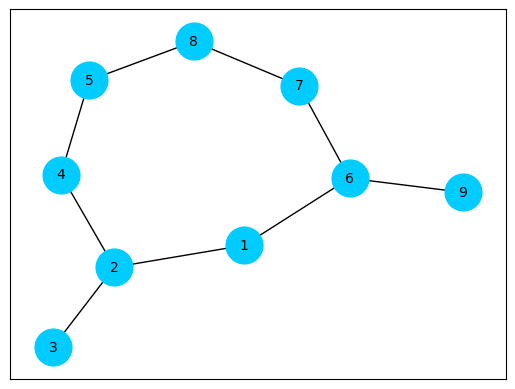

In [3]:
G = GraphVisualization(weighted = False, isDirected = False, adjacency_matrix = graph, useAlphabets = False)
G.visualize()

***
## Implementing BFS and DFS

In [4]:
from typing import List

class Traversal:
    def __init__(self, graph_:List[List[int]]):
        self.graph = graph_  # assuming the reference is never going to change, we do a shallow copy
        self.visitedStack = [False for i in graph_]
        self.traversalQueue = []
        self.showVertex = lambda vertex: print(vertex + 1, end = " ")

    def BFS(self, startVertex = 0):
        self.showVertex(startVertex)
        self.traversalQueue.append(startVertex)
        self.visitedStack[startVertex] = True
        while len(self.traversalQueue) > 0:
            vertex = self.traversalQueue[0]
            for i in range(len(self.visitedStack)):
                edge = self.graph[vertex][i]
                if edge > 0 and not self.visitedStack[i]:
                    self.showVertex(i)
                    self.visitedStack[i] = True
                    self.traversalQueue.append(i)
            self.traversalQueue.pop(0)

        # re-setting the visited stack
        self.visitedStack = [False for i in self.visitedStack]

    def DFS(self, startVertex = 0):
        def traverse(currentVertex = startVertex):
            if self.visitedStack[currentVertex]:
                return
            self.showVertex(currentVertex)
            self.visitedStack[currentVertex] = True
            for vertex in range(len(self.visitedStack)):
                edge = self.graph[currentVertex][vertex]
                if edge > 0 and not self.visitedStack[vertex]:
                    traverse(vertex)
        traverse()
        # re-setting the visited stack
        self.visitedStack = [False for i in self.visitedStack]     

## Driver code

In [5]:
t = Traversal(graph)
print("BFS Traversal:"); t.BFS()
print("\nDFS Traversal:"); t.DFS()

BFS Traversal:
1 2 6 3 4 7 9 5 8 
DFS Traversal:
1 2 3 4 5 8 7 6 9 

***